In [1]:
## Ignore this code, this is just generating some data
library(infer)
library(tidyverse)
library(nycflights13)
library(palmerpenguins)

── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## 1. **AN**alysis **O**f **VA**riance (ANOVA)

- We learned how to compare the mean of two groups: `t.test` or permutation test.

- But how does it work when we have more than two groups?

- For example, imagine we have $k$ groups. We set the hypotheses to be:
$$H_0: \mu_1=\mu_2=...=\mu_k\quad\quad vs \quad\quad H_A: \mu_i\neq \mu_j, \text{ for at least one } i\neq j$$
    
- In other words, the alternative hypothesis of ANOVA suggests that at least one group has a different mean
    - We don't need all the groups to have a different mean. It is enough that one group has a different mean for $H_0$ to be false.      
    
- Let's explore ANOVA with an example.

### 1.1 cars dataset

In [2]:
# cell-01
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


In [3]:
# cell-02
# Let's make cyl a factor
cars <- mtcars %>%
    mutate(cyl = as_factor(cyl))

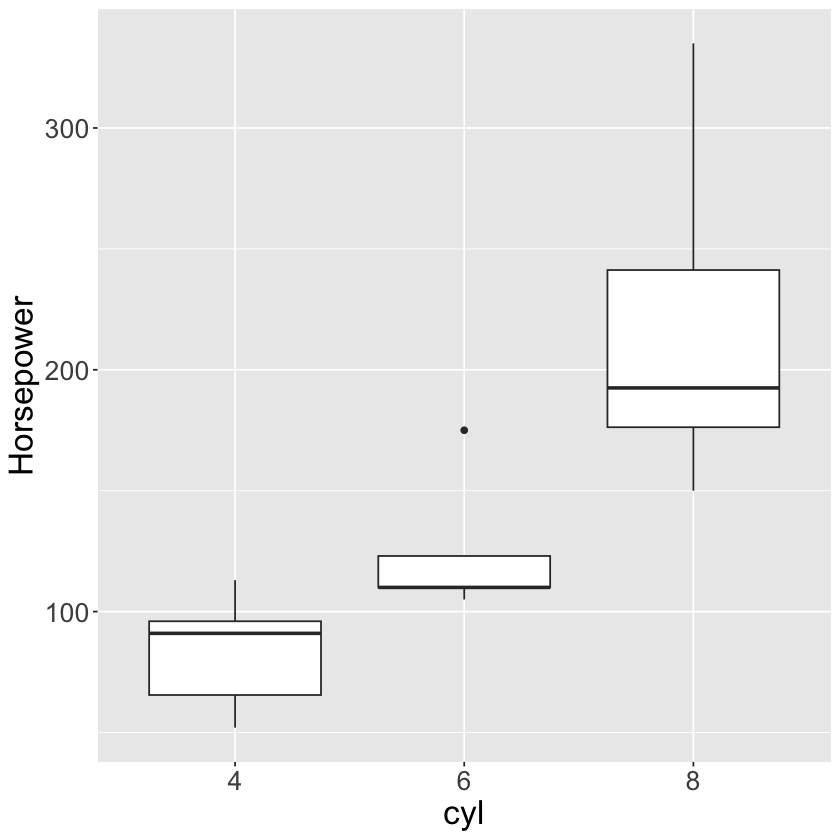

In [4]:
# cell-03
# Let's take a look
cars %>%
    ggplot(aes(cyl, hp)) + 
    geom_boxplot() + 
    ylab('Horsepower') +
    theme(text = element_text(size = 20))

- The idea of ANOVA is to compare the variation within each group/category against the variation between the groups/category.

- If the within-group spread is small compared to the between-group spread, then we have evidence of difference. 

### 1.2 Variability within the groups (SSE)

- We want to see how spread the points of a group are around its mean.

1. We take the difference of each point to the mean of its group.
2. Take the square of these differences;
3. Sum the square difference for all points

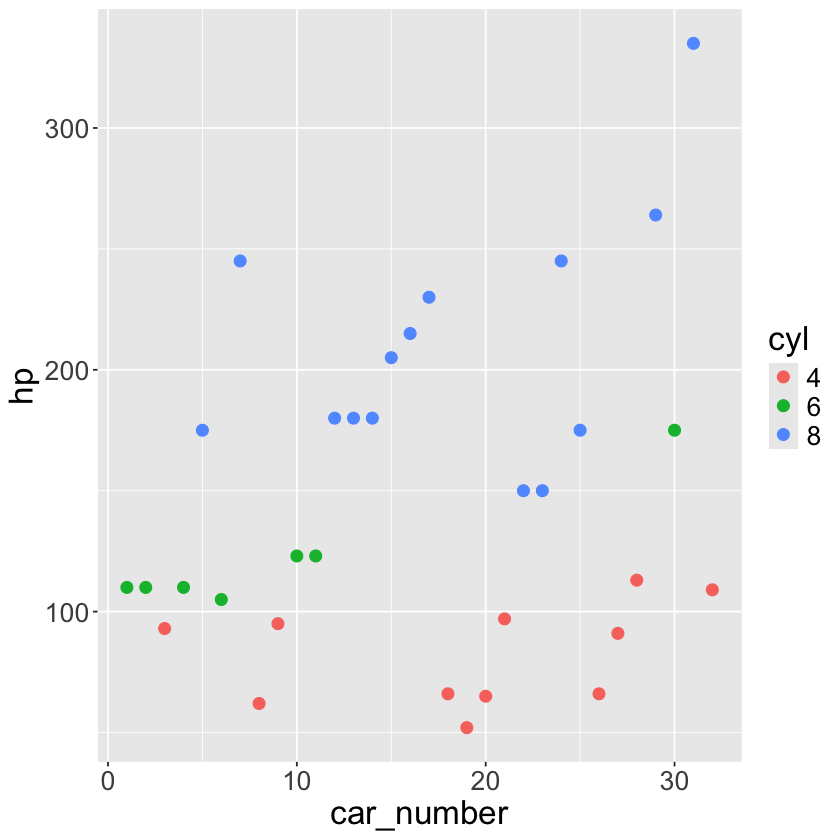

In [66]:
# cell-04 
# Let's plot the data
cars %>%
    mutate(car_number = 1:nrow(cars)) %>%
    ggplot(aes(car_number, hp, color = cyl)) + 
    geom_point(size=3) +
    theme(text = element_text(size = 20)) #+ 
    #geom_hline(aes(yintercept = cars %>% filter(cyl == 4) %>% pull(hp) %>% mean()), color = 'red') +
    #geom_hline(aes(yintercept = cars %>% filter(cyl == 6) %>% pull(hp) %>% mean()), color = 'darkgreen') +
    #geom_hline(aes(yintercept = cars %>% filter(cyl == 8) %>% pull(hp) %>% mean()), color = 'blue')

In [6]:
# cell-05
# Calculate the SSE
SSE <-
    cars %>% 
    group_by(cyl) %>%
    mutate(group_avg = mean(hp)) %>%
    ungroup() %>%
    summarise(SSE = sum((hp - group_avg)**2)) %>%
    pull(SSE)

SSE

[1] 41696.33

### 1.3 Variability between groups (SST)



- We want to see how the **mean** of each group varies around the **overall mean** (the mean considering all the points of all the groups).
  
1. Take the difference between the mean of each group and the overall mean;
2. Take the square of the difference
3. Multiply the square difference by the number of points in the group.

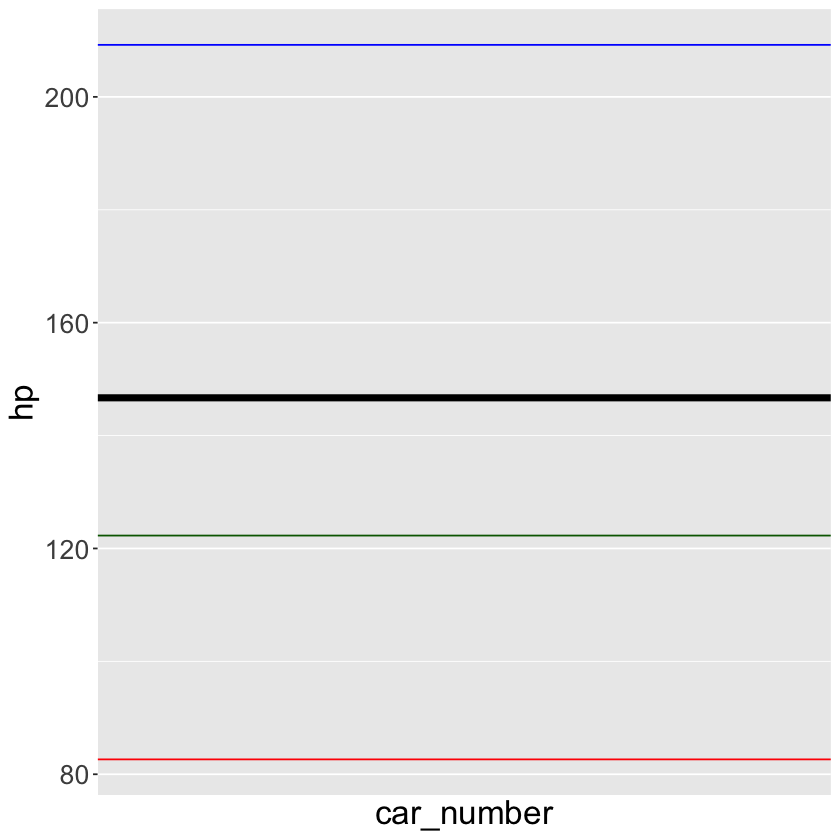

In [67]:
# cell-06
# Plot the means for the variability between groups
cars %>%
    mutate(car_number = 1:nrow(cars)) %>%
    ggplot(aes(car_number, hp, color = cyl)) + 
    #geom_point(size=3) +
    theme(text = element_text(size = 20)) + 
    geom_hline(aes(yintercept = cars %>% filter(cyl == 4) %>% pull(hp) %>% mean()), color = 'red') +
    geom_hline(aes(yintercept = cars %>% filter(cyl == 6) %>% pull(hp) %>% mean()), color = 'darkgreen') +
    geom_hline(aes(yintercept = cars %>% filter(cyl == 8) %>% pull(hp) %>% mean()), color = 'blue') + 
    geom_hline(aes(yintercept = mean(cars$hp)), color = 'black', lwd = 2) 

In [68]:
# cell-07 
# Calculate SST
SST <-
    cars %>% 
    group_by(cyl) %>%
    mutate(group_avg = mean(hp),
           overall_mean = mean(cars$hp)) %>%
    ungroup() %>%
    mutate(square_differences = (group_avg - overall_mean)**2) %>%
    summarise(SST = sum(square_differences)) %>% 
    pull(SST)

SST

[1] 104030.5

### 1.4 Degrees of freedom 

We want to compare the SSE and SST, but they are dependent on the number of groups and points in each group we have. To account for that, we will compute some sort of average. But instead of dividing by the number of points we will use the so-called "Degrees of Freedom". 

- The degrees of freedom for SST: is the number of groups - 1.
- The degrees of freedom for SSE: is the number of points minus the number of groups.

In [9]:
# cell-08
# Get MSE and MST

k = 3 # number of groups
n = nrow(cars) # numbers of points

MSE = SSE/(n - k) # MSE stands for MEAN SQUARE ERROR
MST = SST/(k-1) # MST stands for MEAN SQUARE TREATMENT

### 1.5 The F-statistic

- Now that we have accounted for the number of points and number of groups, we can compare the MSE and MST.

- The test statistic for ANOVA is then given by

$$
F = MST/MSE
$$

In [69]:
# cell-09
# Calculate F-statistic
(F = MST/MSE)

[1] 36.17687

**<font color= "red">It is time for CLICKER QUESTION!!</font>**

### 1.6 ANOVA in R

To do ANOVA in R, we use the `aov` function: 

```
aov(formula = response ~ grouping_variable,
    data = dataframe)
```

In [23]:
# cell-10
# Solve the problem above using aov
aov(hp ~ cyl, data = cars)

Call:
   aov(formula = hp ~ cyl, data = cars)

Terms:
                      cyl Residuals
Sum of Squares  104030.54  41696.33
Deg. of Freedom         2        29

Residual standard error: 37.91839
Estimated effects may be unbalanced

The `broom::tidy` extracts all the info in a dataframe for you:

In [24]:
# cell-11
# Call broom::tidy on the aov object
broom::tidy(aov(hp ~ cyl, data = cars))

term,df,sumsq,meansq,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
cyl,2,104030.54,52015.272,36.17687,1.318541e-08
Residuals,29,41696.33,1437.805,NA,NA


Let's see if it matches what we did. 

- `sumsq` is our SS terms
    -  `sumsq` of `cyl` is SST
    -  `sumsq` of residuals is SSE

In [25]:
# cell-12
SST
SSE

[1] 104030.5

[1] 41696.33

- `meansq` is our MS terms
    -  `meansq` of `cyl` is MST
    -  `meansq` of residuals is MSE

In [26]:
# cell-13
MST
MSE

[1] 52015.27

[1] 1437.805

### 1.7 Assumptions for ANOVA

- The population of all groups follow a Normal distribution;
- All the population have the same variance.
    - In practice, we are fine as long as the largest variance is not multiple times larger than the smallest variance. 
<br>
- The samples are independent across and within each group. 

### 1.8 Tuckey Honest Significant Difference 

The issue with ANOVA is that it only tells us that at least one group has a different mean. But it doesn't tell us which groups are different. 

Once we detect that there is a difference with ANOVA, we can study pairwise difference of means by using Tukey's HSD. Tukey's HSD will basically make pairwise tests, but it will control the probability of Type I Error. 

In [28]:
# cell-14
# TukeyHSD
TukeyHSD(aov(hp ~ cyl, data = cars))

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = hp ~ cyl, data = cars)

$cyl
         diff       lwr       upr     p adj
6-4  39.64935 -5.627454  84.92616 0.0949068
8-4 126.57792 88.847251 164.30859 0.0000000
8-6  86.92857 43.579331 130.27781 0.0000839
